<ipython-input-38-8d12c3e47be8>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[3] = data[3].str.replace('[', '')
<ipython-input-38-8d12c3e47be8>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[7] = data[7].str.replace(']', '')
<ipython-input-38-8d12c3e47be8>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[7] = data[7].str.replace(')', '')


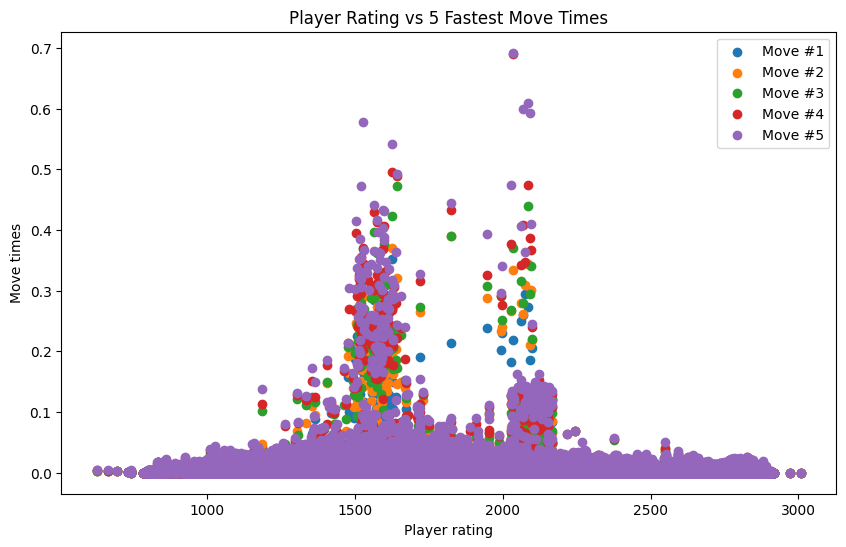

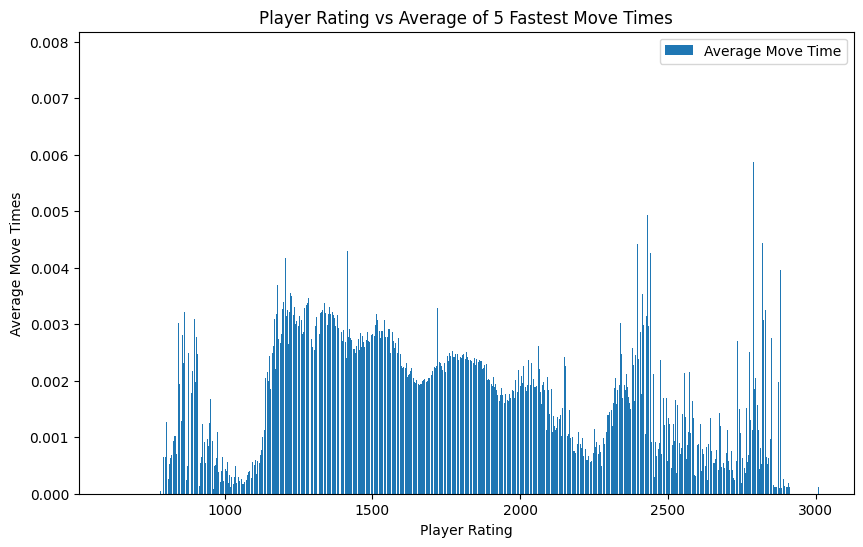

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

months = ["jan", "feb", "march", "april", "may", "june", "july", "aug", "sept", "oct", "nov", "dec"]
data = pd.DataFrame()
for month in months:

    #Comment out whichever, depending if you want fastest or slowest

    #file_path = f"/content/{month}_slowest"
    file_path = f"/content/{month}_fastest"

    data_month = pd.read_csv(file_path, sep='\s*,\s*|\s+', header=None, engine='python')
    data = pd.concat([data, data_month], ignore_index=True)

data[3] = data[3].str.replace('[', '')
data[7] = data[7].str.replace(']', '')
data[7] = data[7].str.replace(')', '')

data[2] = pd.to_numeric(data[2], errors='coerce')
data[3] = pd.to_numeric(data[3], errors='coerce')
data[4] = pd.to_numeric(data[4], errors='coerce')
data[5] = pd.to_numeric(data[5], errors='coerce')
data[6] = pd.to_numeric(data[6], errors='coerce')
data[7] = pd.to_numeric(data[7], errors='coerce')

plt.figure(figsize=(10, 6))
for col in range(3, 8):
    plt.scatter(data[2], data[col], label=f'Move #{col - 2}', marker='o')
plt.xlabel('Player rating')
plt.ylabel('Move times')
#plt.title('Player Rating vs 5 Slowest Move Times')
plt.title('Player Rating vs 5 Fastest Move Times')
plt.legend()
plt.show()

move_columns = [3, 4, 5, 6, 7]
average_move_times_by_rating = data.groupby(2)[move_columns].mean()

plt.figure(figsize=(10, 6))
bar_width = 0.8
plt.bar(average_move_times_by_rating.index, average_move_times_by_rating.mean(axis=1), width=bar_width, label='Average Move Time')
plt.xlabel('Player Rating')
plt.ylabel('Average Move Times')
#plt.title('Player Rating vs Average of 5 Slowest Move Times')
plt.title('Player Rating vs Average of 5 Fastest Move Times')
plt.legend()
plt.show()